# Система 50%. 
## Введение и основные понятия
&emsp; В комьюнити игры Dota 2 существует теория о нечестном подборе игроков в рейтинговых играх. Некоторые игроки предполагают, что специальная система, называемая "система 50%" подбирает игроков в матч таким образом, чтобы сбалансировать команды.
 
&emsp; Если игрок играет слишком хорошо, ему в команду попадутся те кто играет плохо, так ему будет сложнее поднять себе рейтинг и он больше времени проведет в игре, идя  к своей цели.

&emsp; Один из индикаторов этой системы, по мнению игроков, зависимость между серией побед и поражений. Идея заключается в том, что система определяет игрока победившего много раз подряд как сильного, и начинает подбирать ему слабых игроков (по мнению системы) в команду, а противникам сильных (с учетом их рейтинга, а именно сохраняя баланс по этому показателю), из-за чего после серии побед игрока ждет серия поражений.

&emsp; В данном исследование я решил статистически првоерить эту гипотезу, по большей части оспаривая тезис о наличии взаимосвязей между серией побед и серий поражений.

> *Match making rating (MMR/рейтинг) - публичный игровой показатель определяющий силу конкретного игра. Используется для подбора команд равного уровня силы в Dota 2*

> *Серия побед/поражений - результат исхода нескольких матчей идущих подряд, когда игрок либо выиграл все эти матчи либо проиграл*


## Сбор статистики. Методология. 

&emsp; Для данного исследования я собирал статистику используя бесплатное api ресурса https:www.opendota.com

&emsp; Так как количество запросов к базе данных на бесплатной версии ограничено 60-тью запросами в минуту я использовал python и библиотеку sqlite чтобы сохранить нужные мне данные в собственную БД. Все скрипты находятся в папке проекта с соответствующими комментариями.

&emsp; Вероятно я использовал возможности данного ресурса не идеально, в любом случае моя методология по сбору статистика имеета вид:

1. Я выбрал случайный айди недавно сыгранного матча (на момент сбора статистики).
2. После я начал собирать базу игроков с открытыми аккаунтами (чья статистика доступна). Я просматривал все матчи по порядку, по в убывающему айди. Я записывал айди игроков принявших участия в этом матче, пока количество игроков (их айди) в моей базе данных не достигло 10 000. Также я записывал MMR игроков (на момент сбора данных).
3. Для каждого игрока я выгрузил список последних 100 сыгранных рейтинговых матчей, определяя, выиграл ли игрок этот матч или проиграл (но количество этих матчей могло быть и меньше 100, если игрок не сыграл достаточное количество матчей).
4. В результирующую выборку попали игроки чье количество сыгранных рейтинговых матчей превышало 100 игр. 
5. У небольшой части игроков количество записанных матчей оказалось выше 100 на несколько матчей, это объясняется тем, что мой скрипт периодически прекращал исполнение из-за бага который я не мог устранить, из-за чего по некоторым айди я выполнял запросы несколько раз, и новые сыгранные игры записывались к старым. Дублирование строк при записи в базу данных я исключил.
6. Размер итоговой выборки составил 2606 игроков.


## Проблемы полученной выборки и искажение данных.

&emsp; Очевидно, что мои данные подверглись довольно большому количеству критериев. Полученная выборка не отражает в полной мере генеральную совокупность всех игроков играющих в рейтинговом режиме. Поэтому я делаю следующее допущение: При наличии "системы 50%" ее влияние будет отражено в полученной мной выборке. 

&emsp; Кроме того, на полученных мною данных (как в результирующей выборке из 2606 игроков так и в выборке из 10 000 игроков), средний винрейт игроков составил 45% вместо ожидаемых 50%. В **среднем** игроки в соревновательную игру не могут проигрывать чаще чем выигрывать. Очевидно что мои данные оказались искажены, что будет учтено дальше. 

&emsp; В конечном итоге я решил использовать полученную выборку с **смещенным** винрейтом, вместо того чтобы подгонять ее под 50% винрейт (что на мой взгляд оказалось бы еще большим искажением данных). Данное искажение имеет несколько возможных объяснений, но что именно является причиной для меня не является возможным определить и устранить. 

&emsp; Давайте еще раз отметим критерии которым должны были удовлетворять наши данные, чтобы попасть в результирующую выборку:

1. Игрок должен обладать публичным аккаунтом
2. Рассматриваются только рейтинговые игры
3. Игрок сыграл более 100 рейтинговых матчей
4. Игрок был активен в последнее время (на момент сбора статистики)
6. В результирующую выборку попали последнии 100 (иногда несколько больше) рейтинговых матчей игрока
5. Для сбора статистики я использовал ресурс OpenDota, а так же написал свой код, позволяющий сохранить мне данные в собственную базу данных на моем компьютере. 

&emsp; Не смотря на все эти требование, я считаю, что с учетом сделанного мной допущения и метода проверки гипотез можно считать полученную выборку репрезентативной (в данном случае).

> *Некоторые условия дублируют друг друга. Это сделано для ясности и отражения этапов формирования результирующей выборки*


## Общая концепция исследования

&emsp; В данном исследовании я хочу сравнить распределение серий побед и поражений в реальных играх с их теоретической моделью. Теоретическая модель подразумевает, что в среднем игрок побеждает в конкретной игре с определенной постоянной вероятностью, которая не меняется в зависимости от количества сыгранных игр. 

&emsp; Система рейтингового подбора игр устроена в Dota таким образом, что игроку требуется большое количество игр, чтобы значительно изменить свой MMR и повлиять на подбор игроков в рейтинговых матчах. Кроме того, это командная игра в которой влияние отдельно взятого игрока весьма ограничено, а его вклад в победу собственной команды зависит от множества случайных факторов. 

&emsp; Лишь небольшой процент игроков имеет сильно положительный винрейт, за счет обмана подбора игры (игра на рейтинге сильно ниже того, что соответствует реальным способностям игрока; использование чужих или новых аккаунтов). В такой теоретической модели распределение длины серии будет соответствовать распределению Пуассона.


## Импорт библиотек, данных, моделирование теоритической выборки

In [1]:
import pandas as pd
import matplotlib as mpl
import sql_data_base_functions as sql_fun
import random
import jupyter_utils as jpu
import math
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import probplot
import seaborn as sns

In [2]:
# функции для определения длины серии для каждой игры из нашей выборке, с разделением игр по игрокам

def make_groups(df):
    group = -1
    buf = -1
    groups = []
    # создаем уникальных групп для каждого отдельной серии побед или поражений
    for row in df.itertuples():
        if buf == row.win_or_loose:
            groups.append(group)  
        else:
            group += 1
            groups.append(group)
            buf = row.win_or_loose
    df['group'] = groups
    return df

def calc_streak(main_df):
    # подсчитываем для каждой игры длину серии к которой эта игра принадлежит
    gdf = main_df.groupby('player_id').apply(lambda df: make_groups(df))
    return gdf.groupby('player_id').apply(lambda df: df['group'].map(lambda g: df['group'].value_counts()[g])).reset_index()['group']

In [3]:
# загрузим данные о наших игр из нашей базы данных
real_games = sql_fun.win_and_loose_by_player()
real_games = pd.DataFrame(real_games, columns=['player_id', 'win_or_loose'])
real_games.head()

,player_id,win_or_loose
0,43325,0
1,43325,0
2,43325,1
3,43325,0
4,43325,0


In [4]:
# установим количество игр в нашей теоретической выборке равное количеству игр в реальной выборке
games_count = real_games.count().player_id
# вероятность победить в игре соответствует среднему винрейту в нашей результирующей выборке в промилях
winrate = real_games['win_or_loose'].where(real_games['win_or_loose'] == 1).count() / real_games['win_or_loose'].count() 
winrate = int(winrate * 1000)
# смоделируем нашу теоретическую выборку, случайным образом определяя победил игрок или проиграл в конкретной игре
theory_games = pd.DataFrame({'win_or_loose': [1 if winrate > random.randint(0, 1000) else 0 for i in range(games_count)]})
# присвоим каждой из игр уникальный айди игрока, по аналогии с реальной выборкой
theory_games['player_id'] = theory_games.index.map(lambda ind: divmod(ind, 100)[0])
theory_games.head()

,win_or_loose,player_id
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [5]:
theory_games['player_id'].value_counts().sort_index()

0       100
1       100
2       100
3       100
4       100
       ... 
2602    100
2603    100
2604    100
2605    100
2606     58
Name: player_id, Length: 2607, dtype: int64

In [6]:
theory_games['streak'] = calc_streak(theory_games)
theory_games

,win_or_loose,player_id,streak
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,1
4,0,0,3
...,...,...,...
260653,0,2606,5
260654,0,2606,5
260655,0,2606,5
260656,1,2606,1


<AxesSubplot:xlabel='streak lenght', ylabel='dist'>

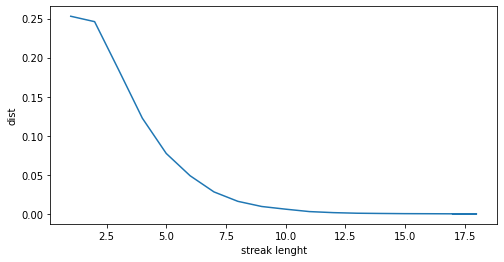

In [7]:
# рассмотрим распределение серии побед в нашей теоретической (смоделированной) выборке
(theory_games['streak'].value_counts() / theory_games['streak'].count()).plot(xlabel='streak lenght', ylabel='dist', figsize=[8,4])

&emsp; Смоделированное распределение имеет вид распределения Пуассона, где средний винрейт игроков это среднее количество событий за фиксированный промежуток времени (одну игру), а количество событий равняется длине серии (т.е каждая точка обозначает вероятность выиграть все k игр при заданной L (лямбда) винрейте). 
> Кроме того, для нашего теоретического распределения будет справедлива ЦПТ.

> *Винрейт - частное всех побед игрока ко всем играм на определенной выборке игр*


## Статистические гипотезы

&emsp; В таком случае:

&emsp; **Нулевая гипотеза** - Распределение серии побед/поражений реальных игроков соответствует распределению Пуассона (каждая точка обозначает вероятность выиграть все k игр при заданной L (лямбда) среднем винрейте игроков в выборке). 

&emsp; **Альтернативная гипотеза** - Распределение серии побед/поражений реальных игроков не соответствует распределению Пуассона, или имеются значительные отклонения от теоретической выборке. (что может свидетельствовать о наличии "системы 50%")

&emsp; Прежде чем начать использовать статистические тесты, вернемся к проблеме 45% винрейта. Можно ли считать нашу выборку репрезентативной при такой явной проблеме?

In [8]:
# рассчитаем винрейты для каждого из игроков
winrate_dist = real_games.groupby('player_id').apply(lambda df: 
                                   df['win_or_loose'].where(df['win_or_loose'] == 1).count() / 
                                   df['win_or_loose'].count()).round(3)
winrate_dist.name = 'winrate'
winrate_dist

player_id
43325         0.500
51547         0.392
82510         0.404
92277         0.380
102022        0.530
              ...  
1191218417    0.450
1196308432    0.350
1212095786    0.370
1218500425    0.490
1265068262    0.450
Name: winrate, Length: 2606, dtype: float64

((array([-3.46415912, -3.21795735, -3.08167096, ...,  3.08167096,
          3.21795735,  3.46415912]),
  array([0.28, 0.28, 0.29, ..., 0.6 , 0.61, 0.61])),
 (0.05115376803375499, 0.45114773599386043, 0.9982875901422822))

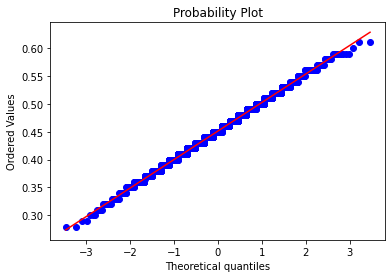

In [9]:
probplot(winrate_dist, dist='norm', plot=sns.mpl.pyplot)

&emsp; Не смотря на то что средний винрейт игроков ~ 45%, распределение винрейтов по игрокам близко к нормальному, что является хорошим признаком нашей выборки.

&emsp; Нормальное распределение говорит нам о **смещенном** винрейте в нашей выборке, в то время как само распределение не является сильно искаженным.

&emsp; Если бы часть данных были бы отброшены, чтобы получить средний винрейт близкий к 50% это сильно бы исказило данные. 

<AxesSubplot:xlabel='streak lenght', ylabel='dist'>

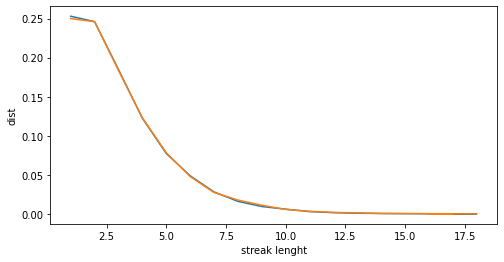

In [10]:
# рассчитаем серии для наших реальных игр и сравним графические полученное распределение с нашим теоретическим
real_games['streak'] = calc_streak(real_games)
(theory_games['streak'].value_counts() / theory_games['streak'].count()).plot(xlabel='streak lenght', ylabel='dist', figsize=[8,4])
(real_games['streak'].value_counts() / real_games['streak'].count()).plot(xlabel='streak lenght', ylabel='dist', figsize=[8,4])

&emsp; Как мы видим, теоретическое  и реальное распределение довольно близки друг к другу. Используем t-тест Уэлча и U-критерий Манна-Уитни для оценки наших выборок. 

In [11]:
# для проведения t-теста я отбрасываю хвосты экстремальных значений, 
# где смоделированные значения сильно отличаются от теоретических/расчетных
df1 = real_games.streak
df2 = theory_games.streak
print(df1.value_counts().sort_index())
print(df2.value_counts().sort_index())
print(ttest_ind(df1, df2, equal_var=False))
print(mannwhitneyu(df1, df2))

1     65155
2     64126
3     47871
4     32080
5     20435
6     12504
7      7161
8      4648
9      2916
10     1510
11      902
12      516
13      377
14      154
15      135
16       64
17       68
18       36
Name: streak, dtype: int64
1     65944
2     64138
3     48168
4     31936
5     20185
6     12750
7      7357
8      4216
9      2493
10     1600
11      792
12      444
13      247
14      168
15      105
16       80
17       17
18       18
Name: streak, dtype: int64
Ttest_indResult(statistic=5.687284423800404, pvalue=1.2914415107879642e-08)
MannwhitneyuResult(statistic=34167923235.0, pvalue=0.00022172123277815797)


In [12]:
# для проведения t-теста я отбрасываю хвосты экстремальных значений, 
# где смоделированные значения сильно отличаются от теоретических/расчетных
df1 = real_games.where(real_games['streak'] <= 16).streak.dropna()
df2 = theory_games.where(theory_games['streak'] <= 16).streak.dropna()
print(df1.value_counts().sort_index())
print(df2.value_counts().sort_index())
print(ttest_ind(df1, df2, equal_var=False))
print(mannwhitneyu(df1, df2))

1.0     65155
2.0     64126
3.0     47871
4.0     32080
5.0     20435
6.0     12504
7.0      7161
8.0      4648
9.0      2916
10.0     1510
11.0      902
12.0      516
13.0      377
14.0      154
15.0      135
16.0       64
Name: streak, dtype: int64
1.0     65944
2.0     64138
3.0     48168
4.0     31936
5.0     20185
6.0     12750
7.0      7357
8.0      4216
9.0      2493
10.0     1600
11.0      792
12.0      444
13.0      247
14.0      168
15.0      105
16.0       80
Name: streak, dtype: int64
Ttest_indResult(statistic=5.069746055173971, pvalue=3.9848281401084906e-07)
MannwhitneyuResult(statistic=34140816929.0, pvalue=0.0004227345788406299)


In [13]:
# для проведения t-теста я отбрасываю хвосты экстремальных значений, 
# где смоделированные значения сильно отличаются от теоретических/расчетных
df1 = real_games.where(real_games['streak'] <= 12).streak.dropna()
df2 = theory_games.where(theory_games['streak'] <= 12).streak.dropna()
print(df1.value_counts().sort_index())
print(df2.value_counts().sort_index())
print(ttest_ind(df1, df2, equal_var=False))
print(mannwhitneyu(df1, df2))

1.0     65155
2.0     64126
3.0     47871
4.0     32080
5.0     20435
6.0     12504
7.0      7161
8.0      4648
9.0      2916
10.0     1510
11.0      902
12.0      516
Name: streak, dtype: int64
1.0     65944
2.0     64138
3.0     48168
4.0     31936
5.0     20185
6.0     12750
7.0      7357
8.0      4216
9.0      2493
10.0     1600
11.0      792
12.0      444
Name: streak, dtype: int64
Ttest_indResult(statistic=4.362263738179348, pvalue=1.2874829833868006e-05)
MannwhitneyuResult(statistic=33950803653.0, pvalue=0.0012817566612735288)


In [14]:
# для проведения t-теста я отбрасываю хвосты экстремальных значений, 
# где смоделированные значения сильно отличаются от теоретических/расчетных
df1 = real_games.where(real_games['streak'] <= 8).streak.dropna()
df2 = theory_games.where(theory_games['streak'] <= 8).streak.dropna()
print(df1.value_counts().sort_index())
print(df2.value_counts().sort_index())
print(ttest_ind(df1, df2, equal_var=False))
print(mannwhitneyu(df1, df2))

1.0    65155
2.0    64126
3.0    47871
4.0    32080
5.0    20435
6.0    12504
7.0     7161
8.0     4648
Name: streak, dtype: int64
1.0    65944
2.0    64138
3.0    48168
4.0    31936
5.0    20185
6.0    12750
7.0     7357
8.0     4216
Name: streak, dtype: int64
Ttest_indResult(statistic=2.2301721536306576, pvalue=0.025736450698225423)
MannwhitneyuResult(statistic=32447080403.0, pvalue=0.04341037845532396)


## Статистические тесты, выводы
&emsp; Как мы видим из приведенных выше тестов, при отсечении хвостов в наших выборках, p-value сильно увеличивается. Экстремальные значения для серии побед или поражений сильно подвержены случайности, в то время как на превалирующем массиве данных не наблюдается статистически значимых различий, что могло бы свидетельствовать о “системе 50%”. 

&emsp; Вероятно представленная теоретическая модель не описывает реальную совокупность рейтинговых игр в должной мере, но и основания для отвержения нулевой гипотезы недостаточны.

## Итоги исследования

&emsp; Данное исследование не позволяет сделать каких-то конкретных выводов. Явные признаки наличия системы 50% не обнаружены, но и для того чтобы утверждать ее полное отсутствие у меня не хватает оснований.

&emsp; Как и во многих исследовательских работах - отрицательный результат, тоже результат. Вероятно выбранный мной метод выявления системы 50% можно доработать, улучив теоретическую модель, проведя исследования на других данных, или устранив критические ошибки данного исследования.

&emsp; Вероятно значительное увеличение выборки устранит проблему случайных хвостов. Для выбранного метода исследования выборка оказалось недостаточно большой, на мой взгляд. 

&emsp; Возможно оценка длины серии побед - ложный путь, который не может дать явных статистических результатов. Перспективным направлением на мой взгляд может оказаться выявления общей "функции" для скользящего среднего винрейта игроков. Этот метод может оказаться более точным и менее требовательным к данным, но является гораздо более трудоемким. 
